<a href="https://colab.research.google.com/github/VirenDevare/Heart-Diesease-Prediction-Using-Binary-Classification/blob/main/Copy_of_heart_disease_prediction_using_neural_networks_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Pandas: 1.5.3
Numpy: 1.22.4
Sklearn: 1.2.2
Matplotlib: 3.7.1
Keras: 2.12.0


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a class="anchor" id="1."></a>
# Importing the Dataset



In [ ]:
# read the csv
cleveland = pd.read_csv('/content/heart_cleveland_upload.csv')
# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
# names = ['age',
#         'sex',
#         'cp',
#         'trestbps',
#         'chol',
#         'fbs',
#         'restecg',
#         'thalach',
#         'exang',
#         'oldpeak',
#         'slope',
#         'ca',
#         'thal',
#         'class']

# read the csv
# cleveland = pd.read_csv(url, names=names)
# print(cleveland)
#  df <- read_csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"))
#  df = df[ , -1]
# import pandas as pd
#      df = pd.read_csv("/content/cleveland (4).data")
# cleveland <- read.csv(url("/content/cleveland (4).data"), header=FALSE)
# url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data"
# cleveland <- read.csv(url,  header = FALSE)
# head(cleveland)
# import requests

# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data'

# response = requests.get(url)

# cleveland = response.content


In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          69
sex           0
cp            0
trestbps    140
chol        239
fbs           0
restecg       0
thalach     151
exang         0
oldpeak     1.8
slope         0
ca            2
thal          0
target        0
Name: 1, dtype: object


In [ ]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,44,1,3,112,290,0,2,153,0,0.0,0,1,0,1
281,44,1,3,110,197,0,2,177,0,0.0,0,1,0,1
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
283,43,0,3,132,341,1,2,136,1,3.0,1,0,2,1
284,43,1,3,115,303,0,0,181,0,1.2,1,0,0,0
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2,0
287,42,0,3,102,265,0,2,122,0,0.6,1,0,0,0
288,42,1,3,136,315,0,0,125,1,1.8,1,0,1,1
289,42,1,3,140,226,0,0,178,0,0.0,0,0,0,0


In [ ]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,44,1,3,112,290,0,2,153,0,0.0,0,1,0,1
281,44,1,3,110,197,0,2,177,0,0.0,0,1,0,1
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
283,43,0,3,132,341,1,2,136,1,3.0,1,0,2,1
284,43,1,3,115,303,0,0,181,0,1.2,1,0,0,0
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2,0
287,42,0,3,102,265,0,2,122,0,0.6,1,0,0,0
288,42,1,3,136,315,0,0,125,1,1.8,1,0,1,1
289,42,1,3,140,226,0,0,178,0,0.0,0,0,0,0


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,44,1,3,112,290,0,2,153,0,0.0,0,1,0,1
281,44,1,3,110,197,0,2,177,0,0.0,0,1,0,1
282,43,1,3,120,177,0,2,120,1,2.5,1,0,2,1
283,43,0,3,132,341,1,2,136,1,3.0,1,0,2,1
284,43,1,3,115,303,0,0,181,0,1.2,1,0,0,0
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0,0
286,43,1,3,110,211,0,0,161,0,0.0,0,0,2,0
287,42,0,3,102,265,0,2,122,0,0.6,1,0,0,0
288,42,1,3,136,315,0,0,125,1,1.8,1,0,1,1
289,42,1,3,140,226,0,0,178,0,0.0,0,0,0,0


In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(301, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca           object
thal          int64
target        int64
dtype: object


In [ ]:
# transform data to numeric to enable further analysis

data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.388704,0.677741,2.169435,131.906977,246.734219,0.142857,0.990033,149.448505,0.348837,1.053156,0.607973,0.671096,0.847176,0.468439
std,9.106320,0.468120,0.963256,17.830068,52.334397,0.350510,0.994937,23.177608,0.504553,1.163772,0.615740,0.935305,0.960850,0.499834
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,2.000000,6.200000,2.000000,3.000000,3.000000,1.000000


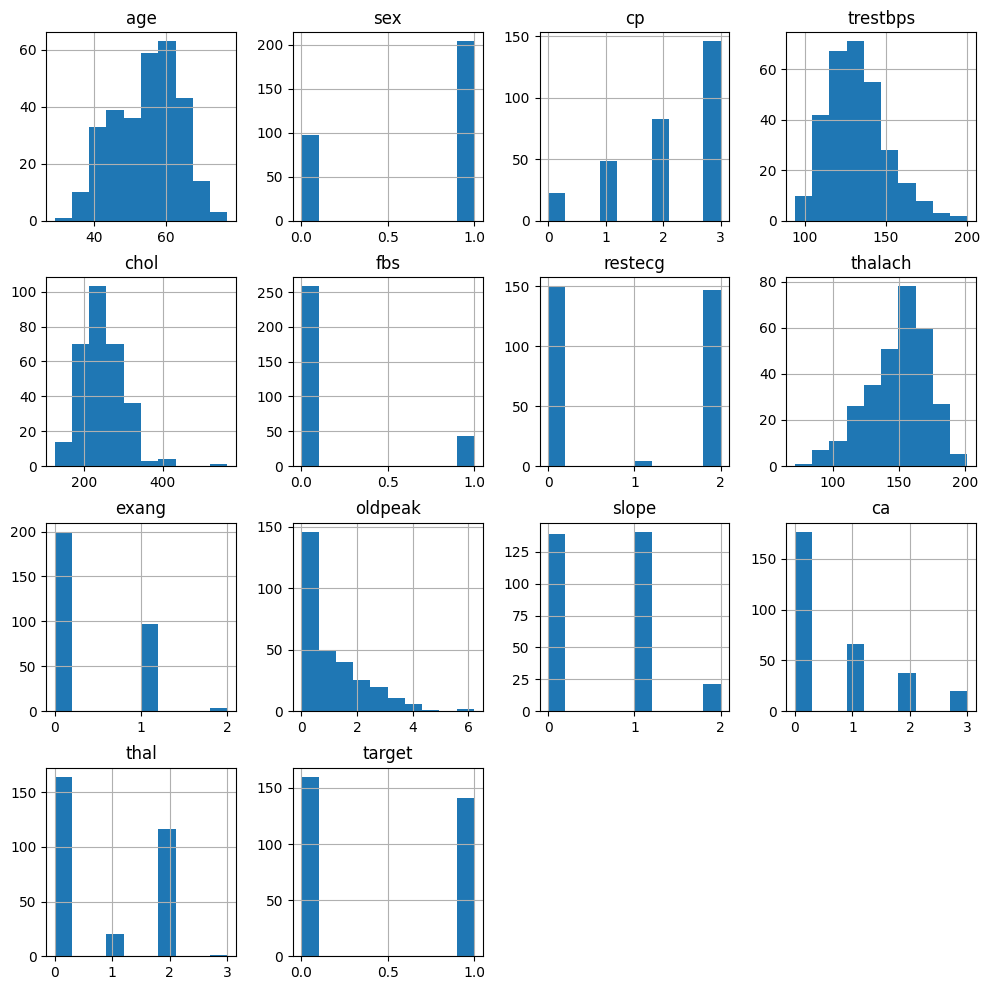

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

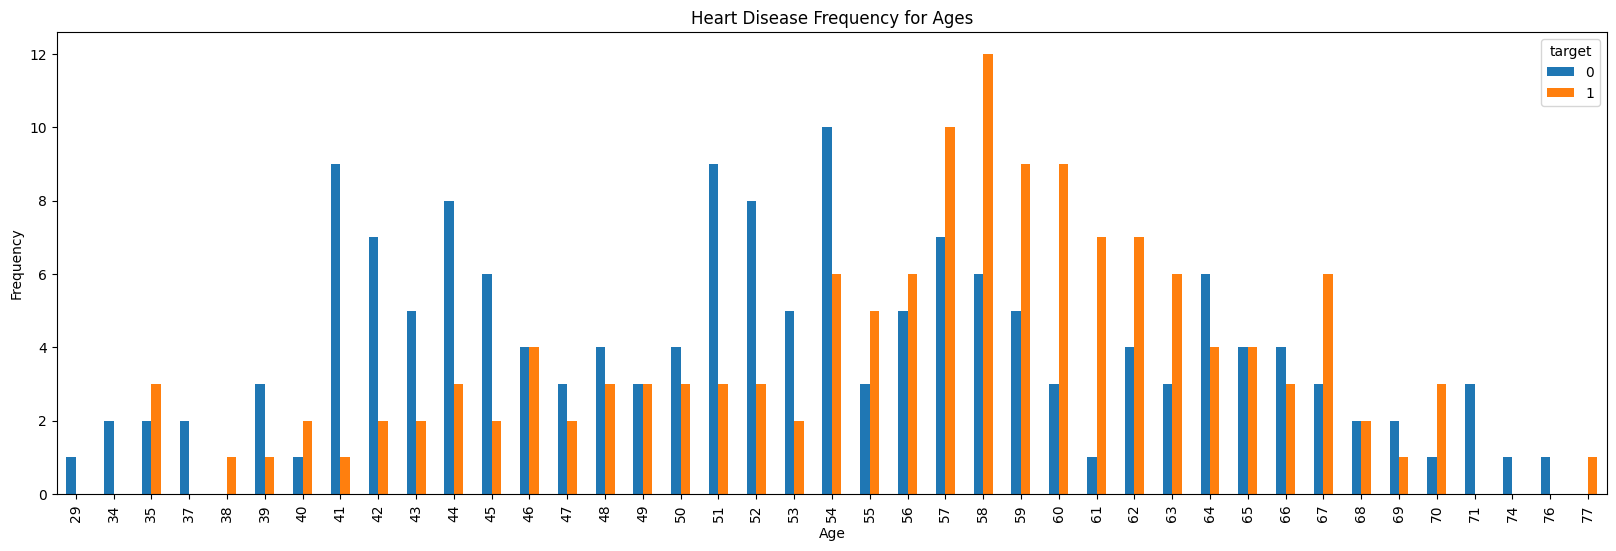

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

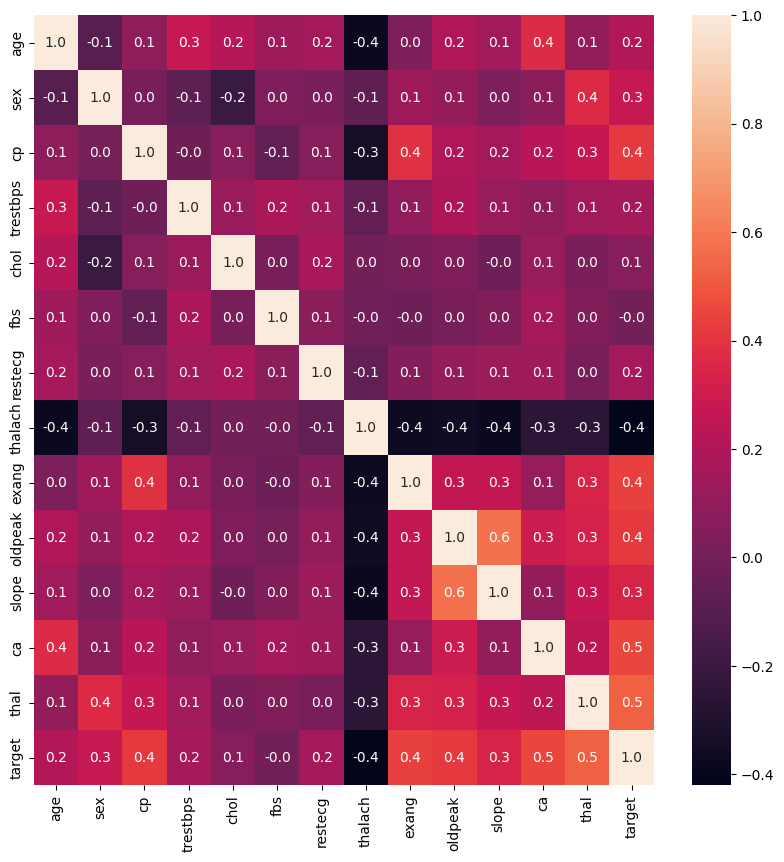

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

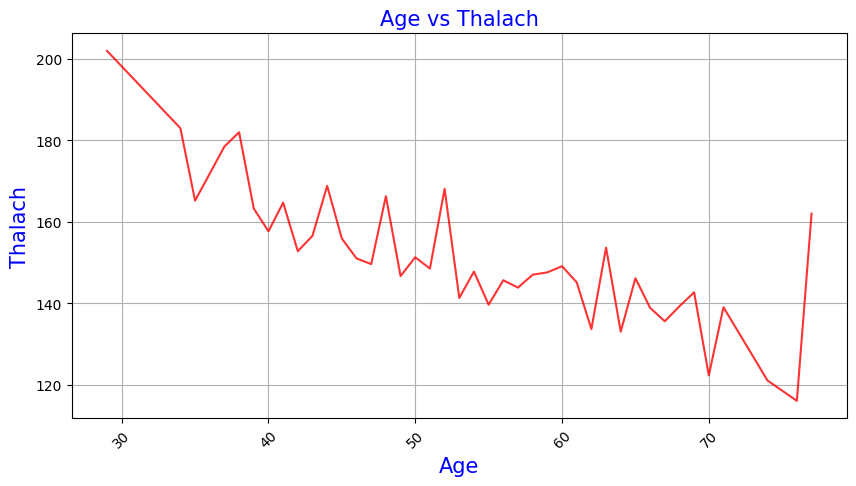

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.lineplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

<a class="anchor" id="2."></a>
# Create Training and Testing Datasets



In [ ]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

<ipython-input-44-7267ba636e09>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


In [ ]:
X[0]

array([6.90e+01, 1.00e+00, 0.00e+00, 1.60e+02, 2.34e+02, 1.00e+00,
       2.00e+00, 1.31e+02, 0.00e+00, 1.00e-01, 1.00e+00, 1.00e+00,
       0.00e+00])

In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
# mean = X_numeric.mean(axis=0)
# X_numeric -= mean
# std = X_numeric.std(axis=0)
# X_numeric /= std

# # Create example array with mixed data types
# X = np.array([[1, 2, 3, 'a'],
#               [4, 5, 6, 'b'],
#               [7, 8, 9, 'c']], dtype=object)

# # Extract numerical columns
# X_numeric = X[:, :-1].astype(float)

# # Calculate mean and standard deviation only on numerical columns
# mean = X_numeric.mean(axis=0)
# X_numeric -= mean
# std = X_numeric.std(axis=0)
# X_numeric /= std

In [ ]:
X[0]

array([ 1.60719444,  0.68955797, -2.25593952,  1.57822204, -0.24372929,
        2.44948974,  1.01679634, -0.79728793, -0.69253018, -0.82038708,
        0.63773536,  0.35223957, -0.88316223])

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(240, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X_train[0]

array([ 0.83721748, -1.45020439,  0.86368282,  0.3422965 ,  0.90465342,
        2.44948974, -0.99672799, -1.87771142, -0.69253018,  0.72888347,
        0.63773536,  2.49414079, -0.88316223])

<a class="anchor" id="3."></a>
# 3.Building and Training the Neural Network



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model


model = create_model()

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                224       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 0.6810 - accuracy: 0.6667 - val_loss: 0.6614 - val_accuracy: 0.8525
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.7875 - val_loss: 0.6170 - val_accuracy: 0.9016
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.8208 - val_loss: 0.5575 - val_accuracy: 0.9344
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.7917 - val_loss: 0.4921 - val_accuracy: 0.9344
Epoch 5/50
24/24 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.8083 - val_loss: 0.4282 - val_accuracy: 0.9180
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.8000 - val_loss: 0.3797 - val_accuracy: 0.9180
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4630 - accuracy: 0.7875 - val_loss: 0.3447 - val_accuracy: 0.9180
Epoch 8/50
24/24 [=

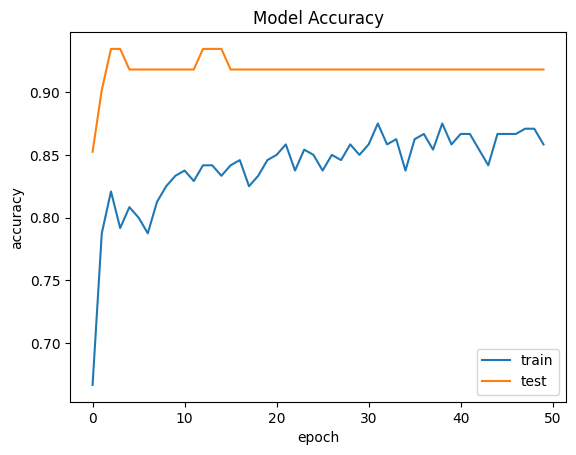

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

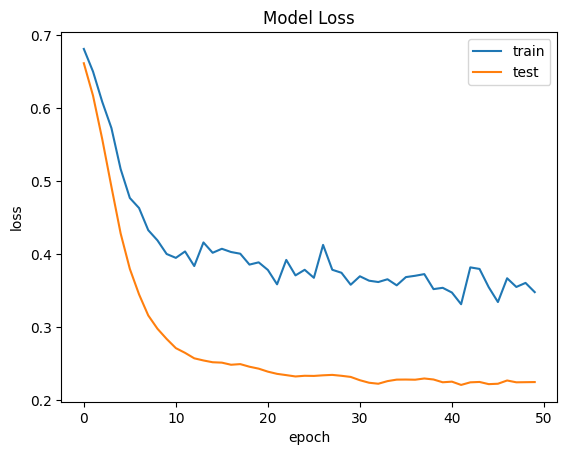

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="4."></a>
# Improving Results  (Binary Classification)


In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0]


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                224       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 8)                 136       
                                                                 
 dropout_21 (Dropout)        (None, 8)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
24/24 [==============================] - 1s 11ms/step - loss: 0.6861 - accuracy: 0.6917 - val_loss: 0.6763 - val_accuracy: 0.7541
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.7375 - val_loss: 0.6551 - val_accuracy: 0.8689
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.7583 - val_loss: 0.6179 - val_accuracy: 0.9016
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.7792 - val_loss: 0.5732 - val_accuracy: 0.9016
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7917 - val_loss: 0.5196 - val_accuracy: 0.9016
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.8125 - val_loss: 0.4741 - val_accuracy: 0.9016
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.4917 - accuracy: 0.8167 - val_loss: 0.4296 - val_accuracy: 0.9016
Epoch 8/50
24/24 [=

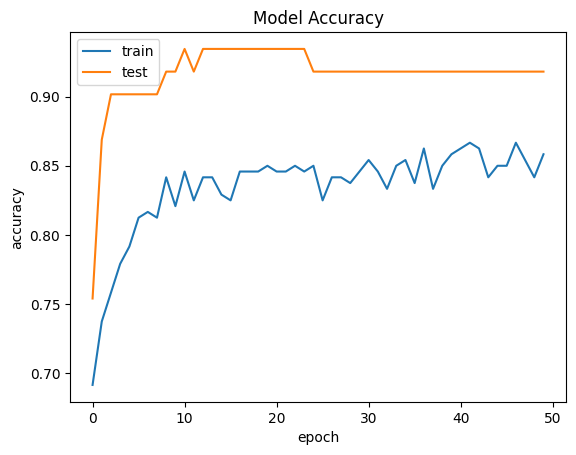

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

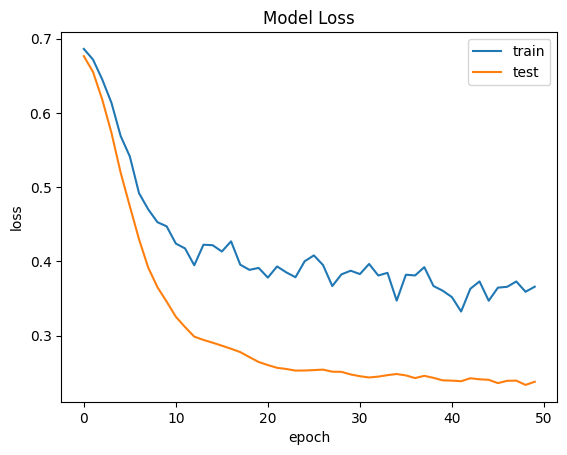

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a class="anchor" id="5."></a>
# 5.Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 1s 7ms/step
Results for Categorical Model
0.9180327868852459
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.83      0.91        29

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61



In [ ]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

2/2 [==============================] - 0s 6ms/step
Results for Binary Model
0.9180327868852459
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.83      0.91        29

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61



In [ ]:
pip install scikeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt), ha='center', va='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Read in data
data = pd.read_csv('/content/heart_cleveland_upload.csv')
X = data.drop('target', axis=1)
y = data['target']

# Set up random forest model
rfc = RandomForestClassifier()

# Set up parameter grid to search
param_grid = {
    'n_estimators': [20],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up grid search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit grid search to data
grid_search.fit(X, y)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Best score: 0.7745762711864407


In [ ]:
# # Set random seed for reproducibility
# # np.random.seed(0)


# import io
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

# # Convert text data to DataFrame
# data = pd.read_csv('/content/heart_cleveland_upload.csv')

# # Split the data into features and target variable
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# # Define the model
# def create_model(num_layers=1, num_neurons=16, dropout_rate=0.2, activation='relu', learning_rate=0.001, optimizer='adam'):
#     model = Sequential()
#     model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation=activation))
#     model.add(Dropout(dropout_rate))

#     for i in range(num_layers-1):
#         model.add(Dense(num_neurons, activation=activation))
#         model.add(Dropout(dropout_rate))

#     model.add(Dense(1, activation='sigmoid'))

#     if optimizer == 'adam':
#         optimizer = Adam(learning_rate=learning_rate)
#     else:
#         optimizer = SGD(learning_rate=learning_rate)

#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Define the hyperparameters
# param_grid_cat = {'batch_size': [16, 32, 64],
#                   'epochs': [50, 100, 200],
#                   'optimizer': ['adam', 'sgd'],
#                   'num_layers': [1, 2, 3],
#                   'num_neurons': [8, 16, 32],
#                   'dropout_rate': [0.2, 0.3, 0.5],
#                   'activation': ['relu', 'tanh', 'sigmoid'],
#                   'learning_rate': [0.001, 0.01, 0.1]}

# # Create the grid search object
# grid_search = GridSearchCV(estimator=KerasClassifier(build_fn=create_model, verbose=0),
#                                param_grid=param_grid_cat, cv=5, n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train, validation_data=(X_test, y_test))

# # Print the best hyperparameters
# print("Best Hyperparameters: ", grid_search.best_params_)

# # Train the model with the best hyperparameters
# best_model = create_model(**grid_search.best_params_)
# best_model.fit(X_train, y_train, epochs=grid_search.best_params_['epochs'], batch_size=grid_search.best_params_['batch_size'], verbose=0)

# # Evaluate the model on the testing data
# accuracy = best_model.evaluate(X_test, y_test)[1]
# print("Accuracy on testing data: {:.2f}%".format(accuracy * 100))


# import io
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier

# # Convert text data to DataFrame
# data = pd.read_csv('/content/heart_cleveland_upload.csv')

# # Split the data into features and target variable
# X = data.iloc[:, :-1]
# y = data.iloc[:, -1]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Create Classefier Object
# classifier = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2)


# # Define the hyperparameters
# param_grid_cat = {'batch_size': [16, 32, 64],
#                   'epochs': [50, 100, 200],
#                   'optimizer': ['adam', 'sgd'],
#                   'num_layers': [1, 2, 3],
#                   'num_neurons': [8, 16, 32],
#                   'dropout_rate': [0.2, 0.3, 0.5],
#                   'learning_rate': [0.001, 0.01, 0.1]}

# # Define the model
# def create_model(num_layers=1, num_neurons=16, dropout_rate=0.2, activation='relu', learning_rate=0.001, optimizer='adam'):
#     from tensorflow.keras.models import Sequential
#     from tensorflow.keras.layers import Dense, Dropout
#     from tensorflow.keras.optimizers import Adam, SGD

#     model = Sequential()
#     model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation=activation))
#     model.add(Dropout(dropout_rate))

#     for i in range(num_layers-1):
#         model.add(Dense(num_neurons, activation=activation))
#         model.add(Dropout(dropout_rate))

#     model.add(Dense(1, activation='sigmoid'))

#     if optimizer == 'adam':
#         optimizer = Adam(learning_rate=learning_rate)
#     else:
#         optimizer = SGD(learning_rate=learning_rate)

#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # Create the grid search object
# # grid_search = GridSearchCV(estimator=KerasClassifier(build_fn=create_model, verbose=0),
# #                                param_grid=param_grid_cat, cv=5, n_jobs=-1)
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid_cat, cv=5, n_jobs=-1)


# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train, validation_data=(X_test, y_test))

# # Print the best hyperparameters
# print("Best Hyperparameters: ", grid_search.best_params_)

# # Train the model with the best hyperparameters
# best_model = create_model(**grid_search.best_params_)
# best_model.fit(X_train, y_train, epochs=grid_search.best_params_['epochs'], batch_size=grid_search.best_params_['batch_size'], verbose=0)

# # Evaluate the model on the testing data
# accuracy = best_model.evaluate(X_test, y_test)[1]
# print("Accuracy on testing data: {:.2f}%".format(accuracy * 100))


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC

# # define the pipeline
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf', SVC())
# ])

# # define the hyperparameters to tune
# param_grid = {
#     'clf__C': [0.1, 1, 10, 100],
#     'clf__kernel': ['linear', 'rbf', 'poly'],
#     'clf__gamma': ['scale', 'auto']
# }

# # define the GridSearchCV object
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1)

# # fit the model and perform hyperparameter tuning
# grid_search.fit(X_train, y_train)

# # get the best hyperparameters
# best_params = grid_search.best_params_
# print('Best hyperparameters:', best_params)

# # evaluate the model using the best hyperparameters
# best_clf = grid_search.best_estimator_
# accuracy = best_clf.score(X_test, y_test)
# print('Test accuracy:', accuracy)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best hyperparameters: {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Test accuracy: 0.7166666666666667


In [ ]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import regularizers
from keras.layers import Dropout
# Function to create model, required for KerasClassifier
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# # load test data
# X_test = ...
# Y_test = ...
X = np.array(X)
y = np.array(y)

# split test data into input (X) and output (Y) variables
# X_test = ...
# Y_test_binary = ...

# fit grid search

# load dataset
# dataset = np.loadtxt("/content/heart_cleveland_upload.csv", delimiter=",")
# split into input (X) and output (Y) variables
# X = X_train
# y =  Y_train_binary
# create model
model = KerasClassifier(model=create_binary_model, verbose=0)
# define the grid search parameters
batch_size = [5,10,20,50,100]
epochs = [25,50,100,150,200,250]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X, y, validation_data=(X_test, Y_test_binary))
grid_result = grid.fit(X_test, Y_test_binary, validation_data=(X_test, Y_test_binary))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
Best: 0.949841 using {'batch_size': 100, 'epochs': 100}
0.886508 (0.081935) with: {'batch_size': 5, 'epochs': 25}
0.919048 (0.059856) with: {'batch_size': 5, 'epochs': 50}
0.902381 (0.037946) with: {'batch_size': 5, 'epochs': 100}
0.902381 (0.037946) with: {'batch_size': 5, 'epochs': 150}
0.852381 (0.003367) with: {'batch_size': 5, 'epochs': 200}
0.918254 (0.022532) with: {'batch_size': 5, 'epochs': 250}
0.919048 (0.059856) with: {'batch_size': 10, 'epochs': 25}
0.853175 (0.037005) with: {'batch_size': 10, 'epochs': 50}
0.885714 (0.045550) with: {'batch_size': 10, 'epochs': 100}
0.885714 (0.020203) with: {'batch_size': 10, 'epochs': 150}
0.869048 (0.022080) with: {'batch_size': 10, 'epochs': 200}
0.885714 (0.020203) with: {'batch_size': 10, 'epochs': 250}
0.886508 (0.058137) with: {'batch_size': 20, 'ep